In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
url = 'https://archiveofourown.org/tags/The%20Walking%20Dead%20(TV)/works'
page = requests.get(url)

if page.status_code != 200:
    print('couldn\'t open url')

soup = BeautifulSoup(page.text, "html.parser")

In [22]:
ships = soup.find('dd', {'id':'include_relationship_tags'}).find('ul')
print(ships)

<ul>
<li>
<label for="include_work_search_relationship_ids_312536">
<input id="include_work_search_relationship_ids_312536" name="include_work_search[relationship_ids][]" type="checkbox" value="312536"/>
<span aria-hidden="true" class="indicator"></span><span>Daryl Dixon/Rick Grimes (3596)</span>
</label> </li>
<li>
<label for="include_work_search_relationship_ids_661521">
<input id="include_work_search_relationship_ids_661521" name="include_work_search[relationship_ids][]" type="checkbox" value="661521"/>
<span aria-hidden="true" class="indicator"></span><span>Daryl Dixon/Beth Greene (2670)</span>
</label> </li>
<li>
<label for="include_work_search_relationship_ids_433336">
<input id="include_work_search_relationship_ids_433336" name="include_work_search[relationship_ids][]" type="checkbox" value="433336"/>
<span aria-hidden="true" class="indicator"></span><span>Daryl Dixon/Carol Peletier (2064)</span>
</label> </li>
<li>
<label for="include_work_search_relationship_ids_1663507">
<inp

In [28]:
# filt = []
ship_list_raw = []
for li in ships.find_all('li'):
    ship_list_raw.append(li.text.strip())

for el in ship_list_raw:
    print(el)

Daryl Dixon/Rick Grimes (3596)
Daryl Dixon/Beth Greene (2670)
Daryl Dixon/Carol Peletier (2064)
Daryl Dixon/Original Female Character(s) (1383)
Rick Grimes/Michonne (1264)
Daryl Dixon/Jesus (1168)
Maggie Greene/Glenn Rhee (1163)
Negan Smith/Original Female Character(s) (1119)
Negan Smith/You (1036)
Rick Grimes/Negan Smith (932)


In [73]:
# df = pd.DataFrame()
ship_list = []
for str in ship_list_raw:
    ship_list.append(str.rsplit(' ',1))

df = pd.DataFrame(ship_list,columns=['Ship name', 'Number of fanfics']).set_index('Ship name')
df['Number of fanfics'] = df['Number of fanfics'].str.replace(r'\D', '').astype(int)
df.head()


C:\Users\tnjtv\AppData\Local\Temp\ipykernel_5336\669572228.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Number of fanfics'] = df['Number of fanfics'].str.replace(r'\D', '').astype(int)


,Number of fanfics
Ship name,
Daryl Dixon/Rick Grimes,3596
Daryl Dixon/Beth Greene,2670
Daryl Dixon/Carol Peletier,2064
Daryl Dixon/Original Female Character(s),1383
Rick Grimes/Michonne,1264


In [59]:
# ship_list[1] = ship_list[1].str.replace(r'\D', '').astype(int)
for ship in ship_list:
    ship[1]=ship[1].replace('(', '').replace(')','') #.astype(int)
    print(ship)

# print(ship_list)

['Daryl Dixon/Rick Grimes', '3596']
['Daryl Dixon/Beth Greene', '2670']
['Daryl Dixon/Carol Peletier', '2064']
['Daryl Dixon/Original Female Character(s)', '1383']
['Rick Grimes/Michonne', '1264']
['Daryl Dixon/Jesus', '1168']
['Maggie Greene/Glenn Rhee', '1163']
['Negan Smith/Original Female Character(s)', '1119']
['Negan Smith/You', '1036']
['Rick Grimes/Negan Smith', '932']


array([<AxesSubplot:ylabel='Number of fanfics'>], dtype=object)

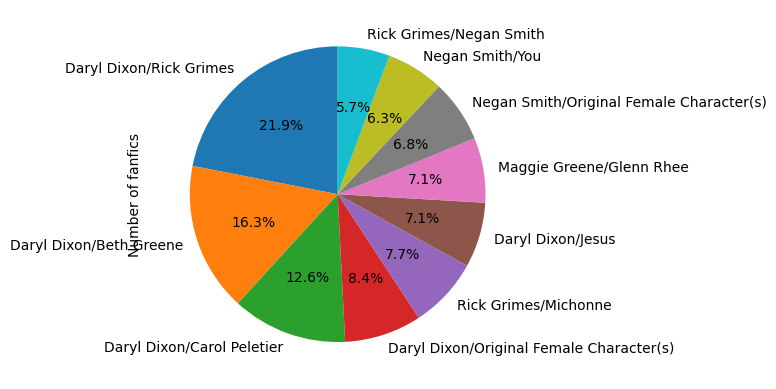

In [77]:
df.plot(kind='pie', startangle=90, subplots=True, autopct='%1.1f%%', legend=False)

In [67]:
plt.pie(df['Number of fanfics'],df['Ship name'])
plt.show()

NameError: name 'plt' is not defined